# Neural Networks, Basics and Examples

Source for Theory:
https://www.kaggle.com/learn/intro-to-deep-learning

Example Dataset: Second Hand Car Prices in Germany:
https://github.com/rahkooy/Car_Price_Prediction

## I. Single Neuron Neural Network is a Linear model

In [6]:
# Tensorflow library and keras from this library is used for building NNs
from tensorflow import keras
from tensorflow.keras import layers 

In [17]:
#Goal: create a linear model accepting three input features and producing a single output

# Sequential creates stack of layers
model_neuron1 = keras.Sequential([
    layers.Dense(units=1, input_shape=[3]) # unites=output unit, input_shape[number of feature cols]
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Exercise
https://www.kaggle.com/code/hamidrahkooy/exercise-a-single-neuron/edit

In [20]:
import pandas as pd
car_df = pd.read_csv('final_car_data.csv')
car_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [31]:
input_shape=[4]

In [33]:
model_neuron2 = keras.Sequential([
    layers.Dense(units=1, input_shape=[4])
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# checking weight and bias of the model
print(model_neuron2.weights)
w,b = model_neuron2.weights
print('weight = ', w)
print("and bias is ", b)

[<KerasVariable shape=(4, 1), dtype=float32, path=sequential_4/dense_4/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_4/dense_4/bias>]
weight =  <KerasVariable shape=(4, 1), dtype=float32, path=sequential_4/dense_4/kernel>
and bias is  <KerasVariable shape=(1,), dtype=float32, path=sequential_4/dense_4/bias>


### Note. Keras represents data/weights as tensors

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


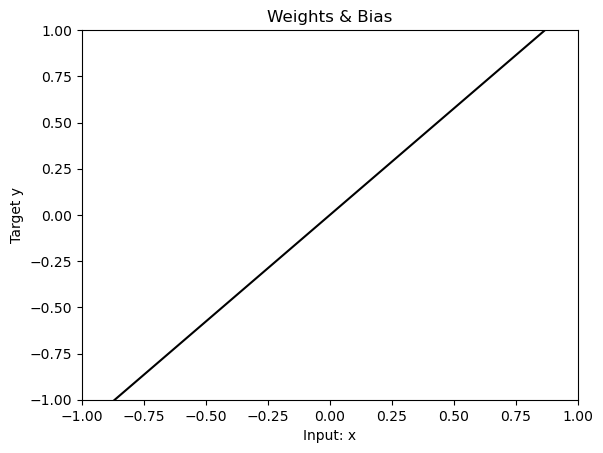

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


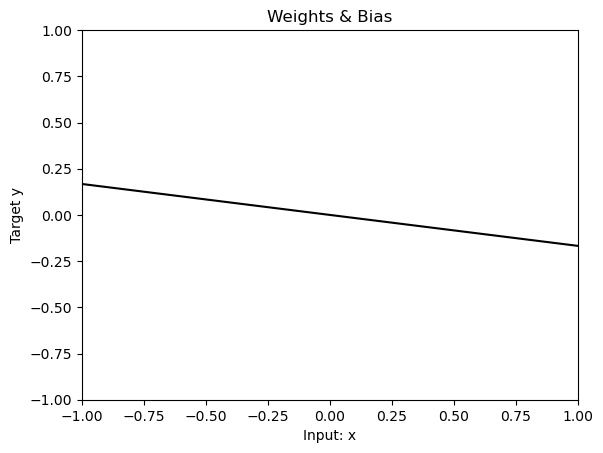

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x308afbd80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


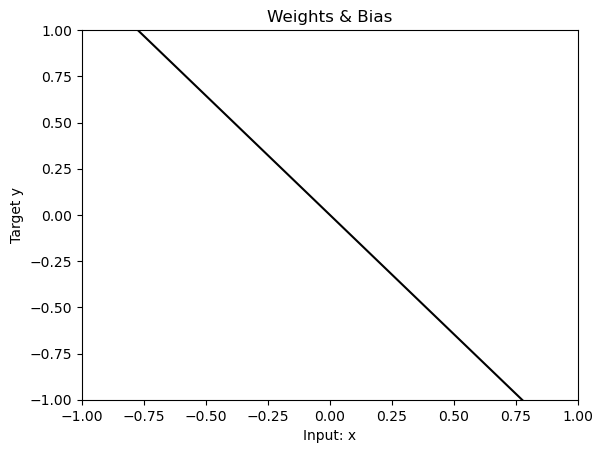

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


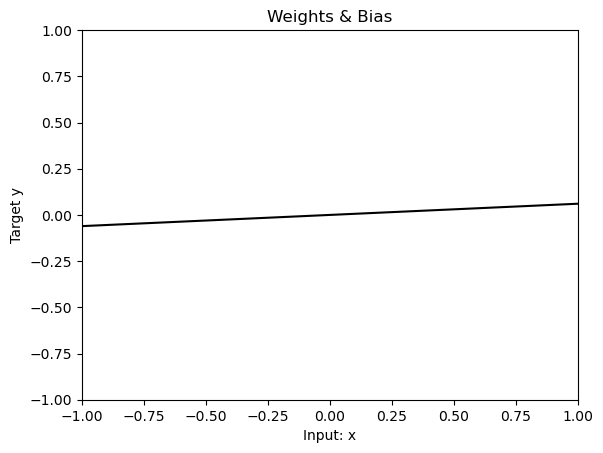

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


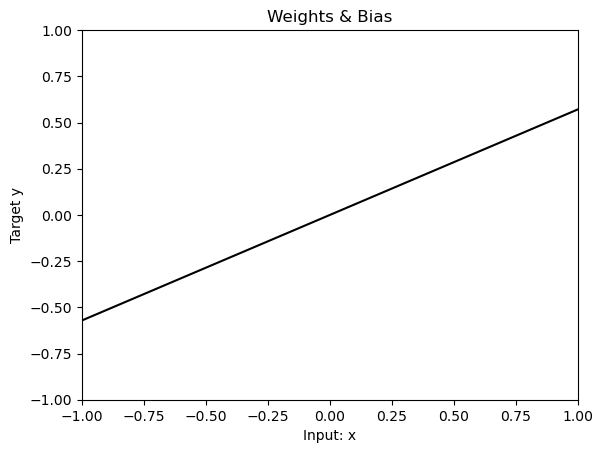

In [38]:
# Checking predicted values using the above model; 
# Note. weights are set randomly initially and change each time we run the model, as seen in the following plots
import tensorflow as tf
import matplotlib.pyplot as plt

for i in [1,2,3,4,5]:
    toy_model = keras.Sequential([
        layers.Dense(units=1, input_shape=[1]),
    ])

    x = tf.linspace(-1.0,1.0,100)
    y = toy_model.predict(x)
    
    plt.figure()
    plt.plot(x,y,'k')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('Input: x')
    plt.ylabel('Target y')
    w, b = toy_model.weights # same as model.get_weights()
    plt.title("Weights & Bias")
    plt.show()

## II. Neural Network with Stacking (at least two) Layers is Nonlinear
Note. Layers can have many data types and can be used for many things.

In [42]:
# Rectifier function = max function 
# We use Rectified Linear Unit,(ReLU), i.e., max(0, wx+b),as the activation function
model_TwoLayer = keras.Sequential([
    # hidden layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # output layer
    layers.Dense(units=1), # no activation function in the output layer, hence just linear function
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Alternatively one can separate activation layers:
model_withActivation = keras.Sequential([
    # hidden layers
    layers.Dense(units=4, input_shape=[2]),
    layers.Activation('relu'),
    layers.Dense(units=3),
    layers.Activation('relu'),
    # output layer
    layers.Dense(units=1), # no activation function in the output layer, hence just linear function
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


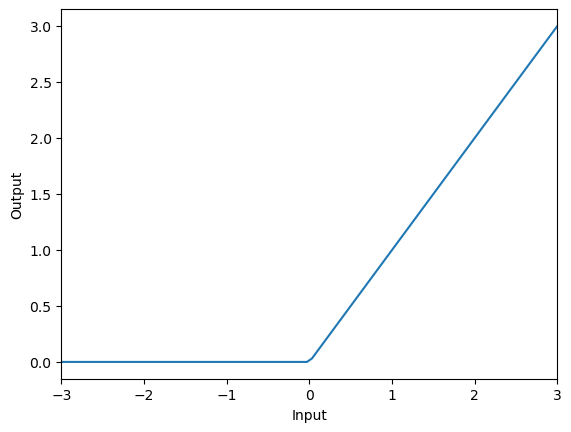

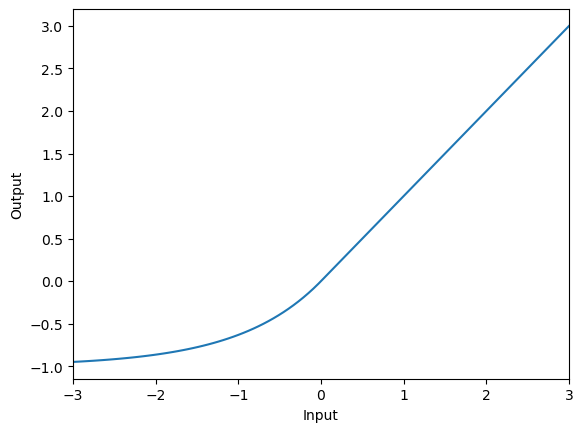

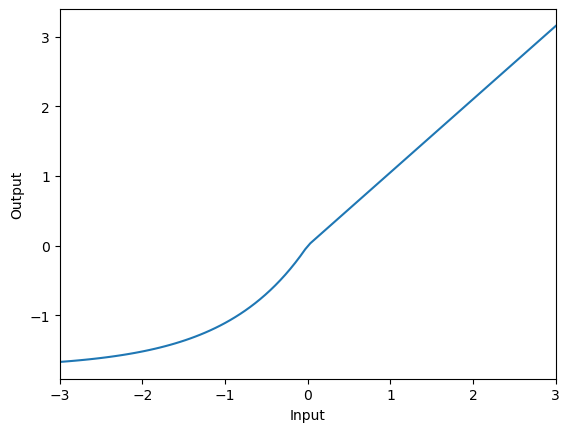

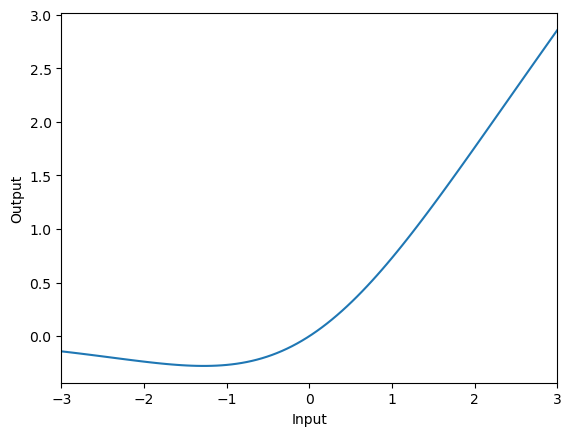

In [48]:
# Alternatives to relu: elu, selu, swish:

activation_list = ['relu', 'elu', 'selu', 'swish']
for act in activation_list:
    activation_layer = layers.Activation(act)
    x = tf.linspace(-3., 3., 100)
    y = activation_layer(x)
    plt.figure()
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.show()
    

## III. Training w Neural Network Model
Goal: train car dataset with a Neural network model

In [51]:
car_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [53]:
X = car_df.drop(columns='price') # training sample
y = car_df['price']
print(X.shape)
print(y.shape)

(120796, 4)
(120796,)


In [55]:
#building NN model: 3 layers, ~1500 neurons

model_car_price = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape = [4]), # input shape = num of cols of X
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# compile optimizer and loss function
model_car_price.compile(
    optimizer='adam', # Adam is a genral optimizer 
    loss = 'mae',
)

In [59]:
#training: fit the model
history = model_car_price.fit(
    X, y,
    batch_size=256,
    epochs=200
)

Epoch 1/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12317.3516
Epoch 2/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6825.7417
Epoch 3/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6445.2007
Epoch 4/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6281.3770
Epoch 5/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6245.9609
Epoch 6/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6301.7705
Epoch 7/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6213.9155
Epoch 8/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6171.0562
Epoch 9/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6178.5469
Epoch 10/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6118.0503
Epoch 11/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6081.7451
Epoch 12/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5962.1240
Epoch 13/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5996.4517
Epoch 14/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5963.1655


<Axes: >

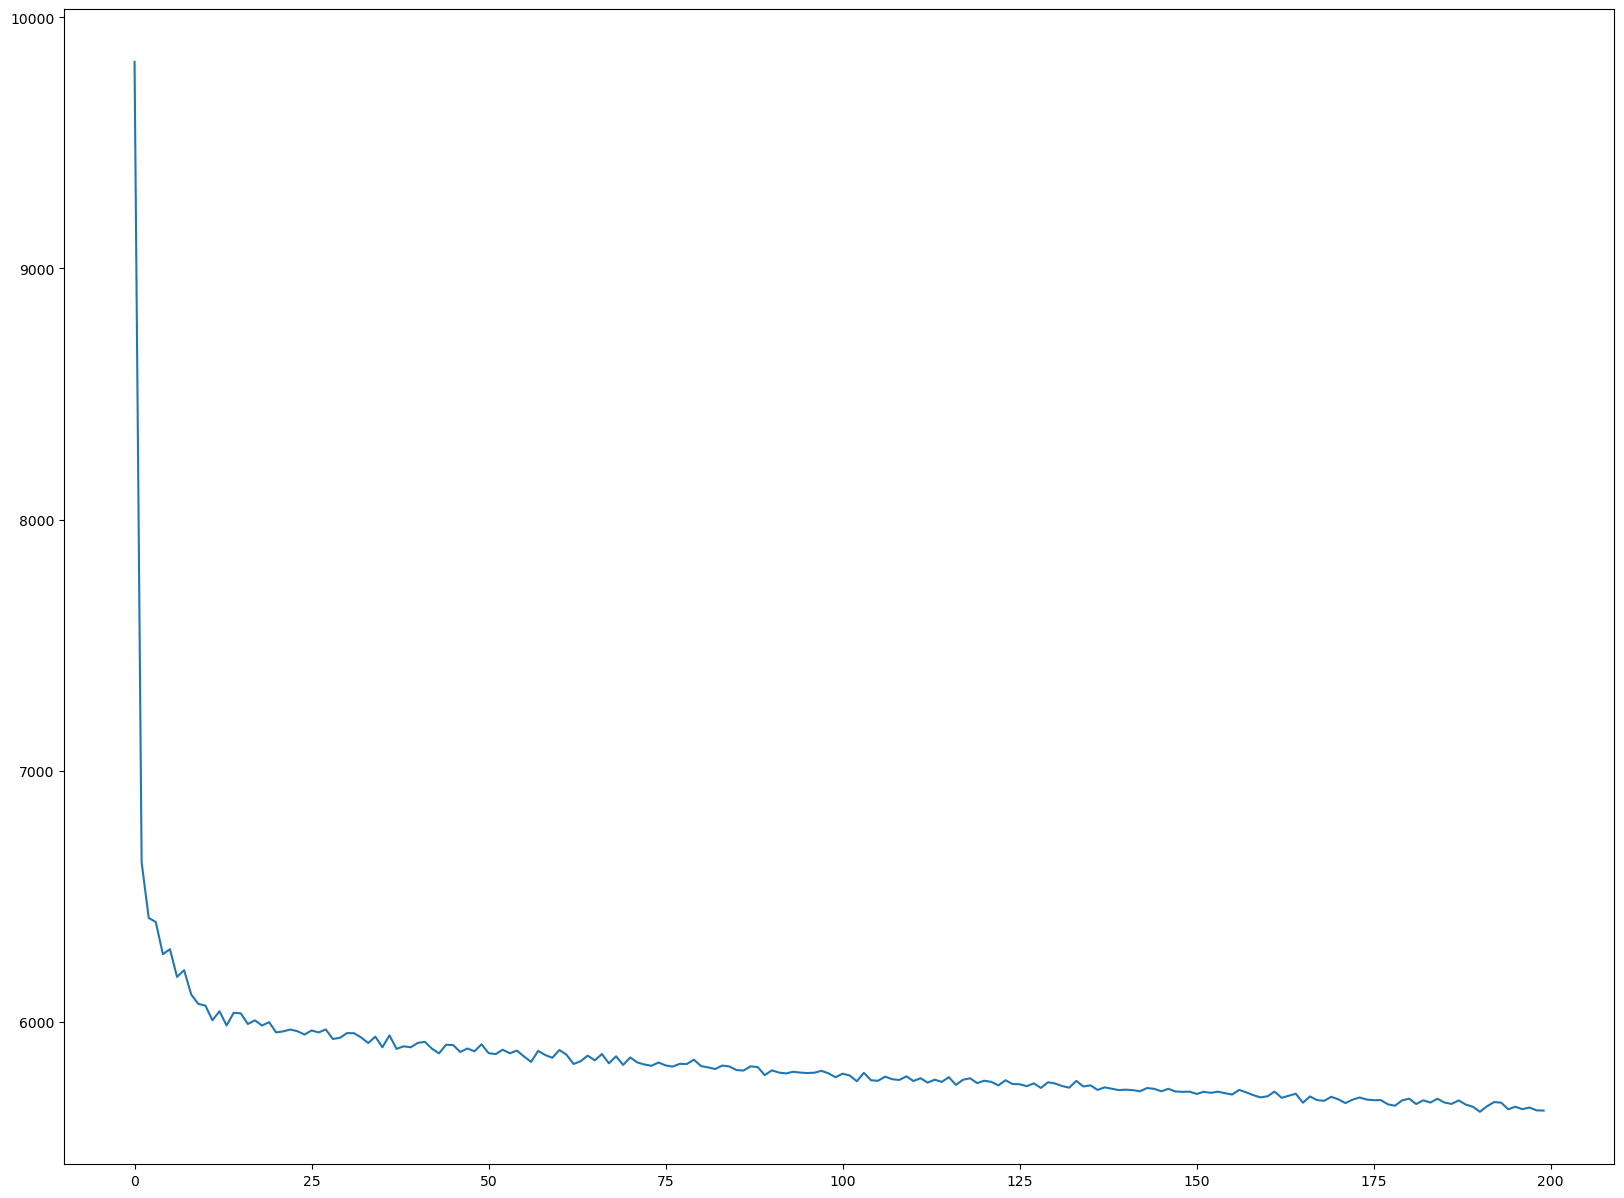

In [61]:
# convert history into a pands dataframe and plot the loss

history_df = pd.DataFrame(history.history)
history_df['loss'].plot(figsize=(20,15))

#### Note. loss levels off as the epochs go by. 
When the loss curve becomes horizontal, it means the model has learned all it can and there would be no reason continue for additional epochs.

### IV. Splitting Data into Train/Test and Comparing Loss with Validation Loss:

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
history = model_car_price.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256
)

Epoch 1/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5597.1045 - val_loss: 5866.7515
Epoch 2/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5647.3018 - val_loss: 5664.7808
Epoch 3/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5599.8057 - val_loss: 5653.3818
Epoch 4/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5624.5713 - val_loss: 5694.8496
Epoch 5/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5586.8398 - val_loss: 5632.9180
Epoch 6/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5553.7461 - val_loss: 6045.4258
Epoch 7/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5662.1255 - val_loss: 5622.6694
Epoch 8/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5600.1074 - val_loss: 6059.8804
Epoch 9/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5668.2515 - val_loss: 5712.9292
Epoch 10/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5490.2891 - val_loss: 5684.3696
Epoch 11/256
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5614.16

<Axes: >

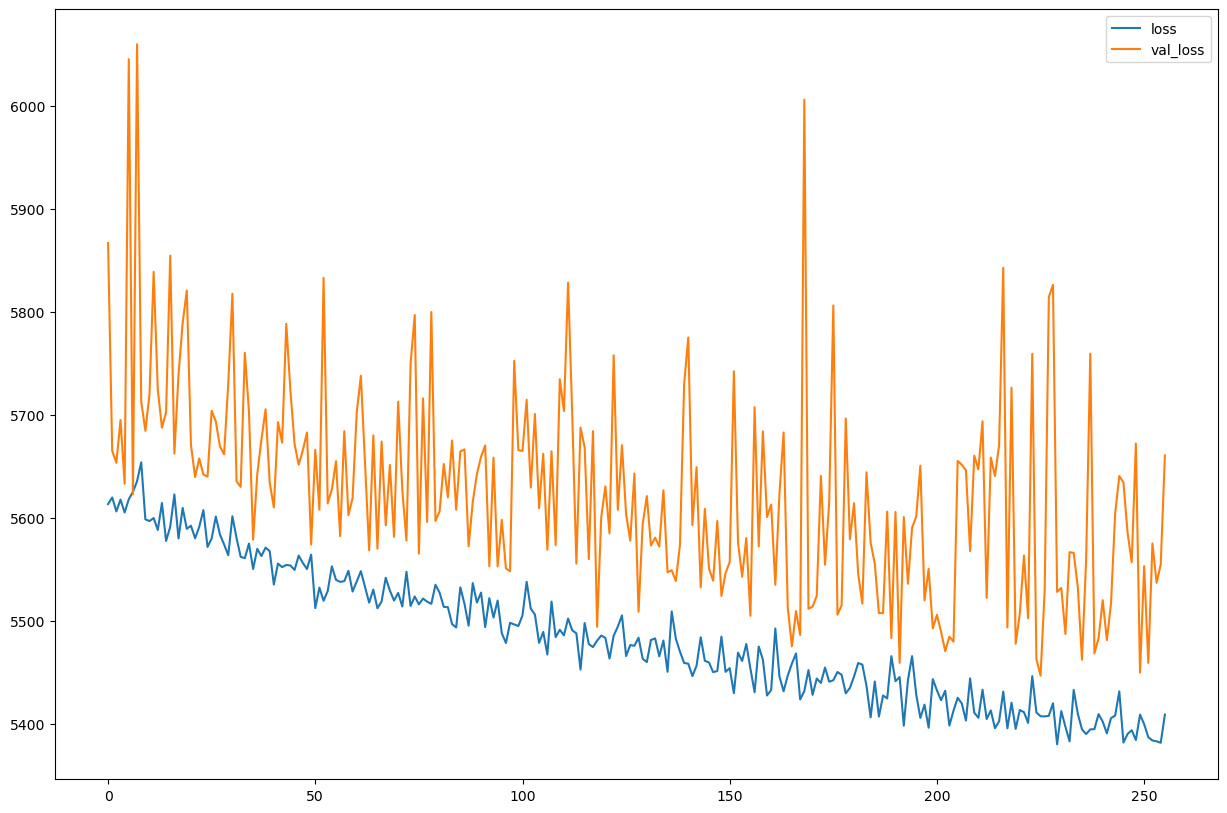

In [72]:
history_df2 = pd.DataFrame(history.history)
history_df2.plot(figsize=(15,10))

## V. Early Stopping to avoid Overfitting/Underfitting
-Capacity of Model: complexity of samples it can learn

-Underfitting --> increase capacity: make NN wide by more units, or deeper by more layers.

-Early Stopping: using callback method

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # if no improvement on validation loss of min 0.001 stop
    patience=20, # num of epochs to wait before stopping
    restore_best_weights=True,
)

In [79]:
history_EarlyStop = model_car_price.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 #turns off training log
)

min validation loss: 5443.94873046875


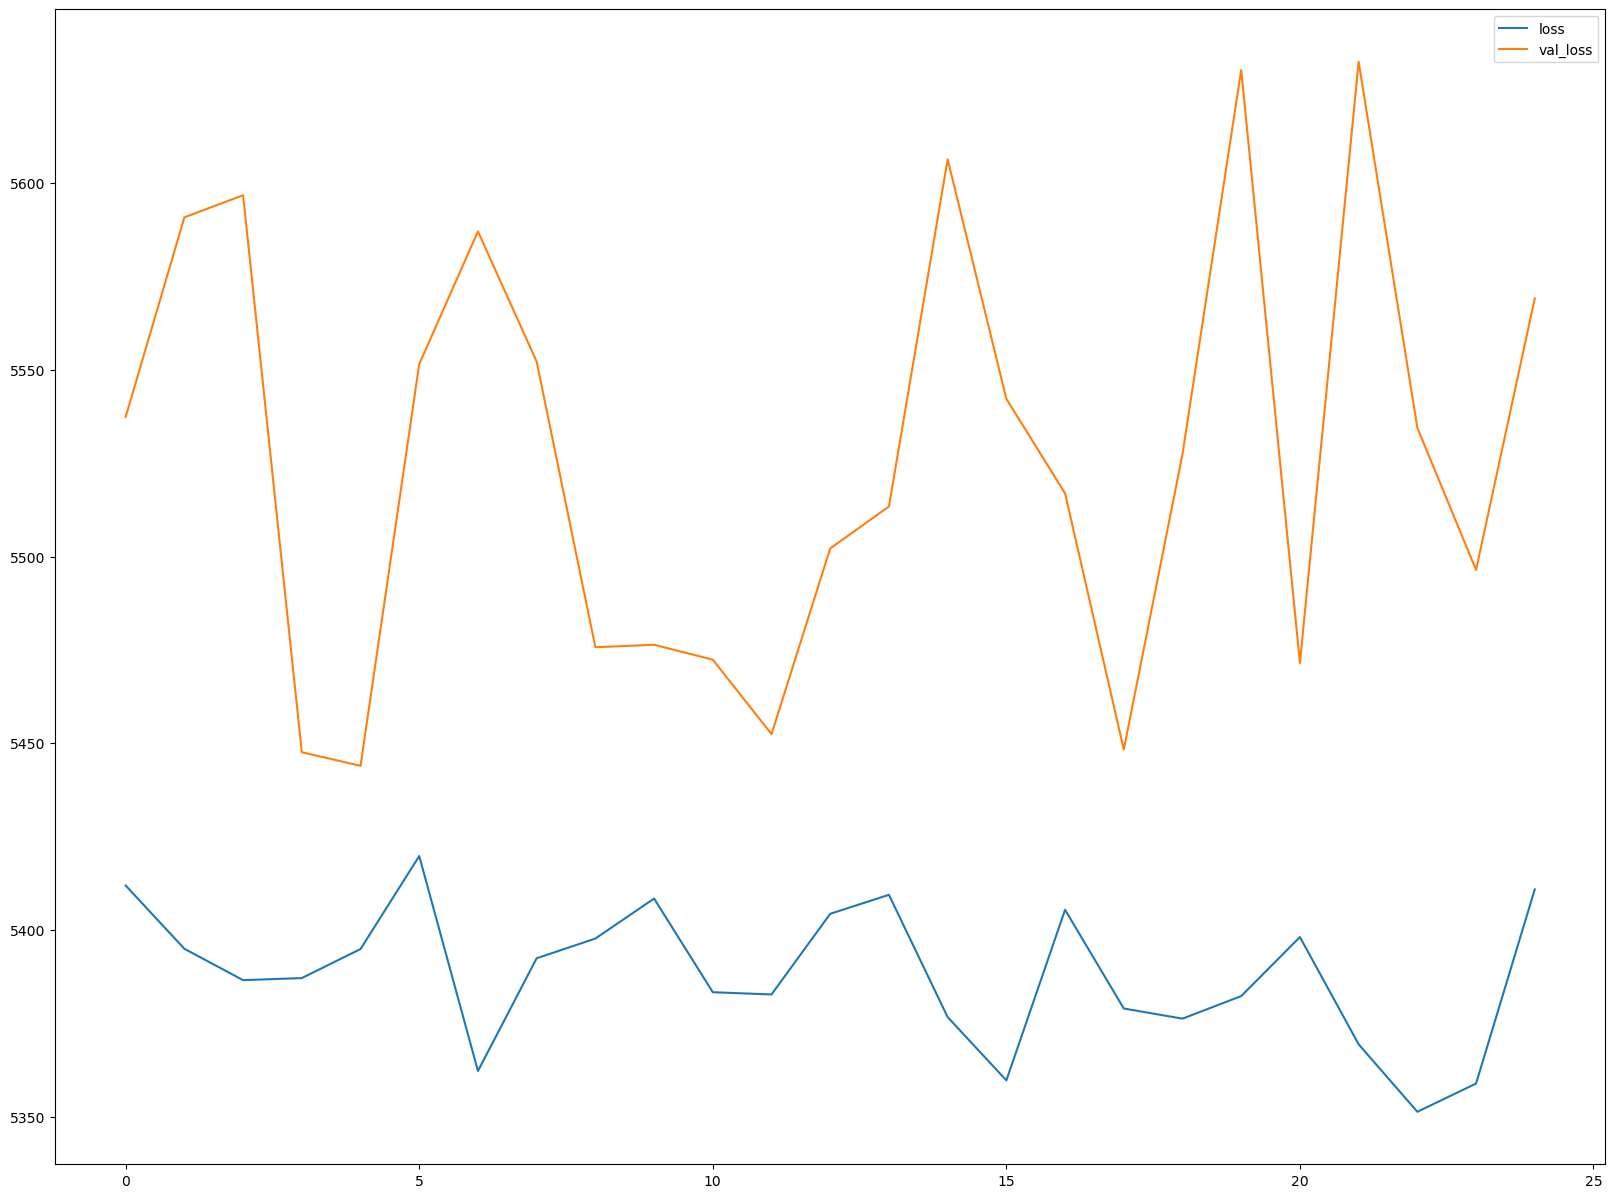

In [81]:
history_EarlyStop_df = pd.DataFrame(history_EarlyStop.history)
history_EarlyStop_df.plot(figsize=(20,15))
print("min validation loss: {}".format(history_EarlyStop_df['val_loss'].min()))

#### Note. Keras has stopped just after 24 epochs, which is much earlier than 200

### Example of Dropout and Normalisation Layers in Neural Networks
For theory  of these layers see: 
https://www.kaggle.com/learn/intro-to-deep-learning

In [135]:
model_with_Normalisation = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[4]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
# compile optimizer and loss function
model_with_Normalisation.compile(
    optimizer='adam', # Adam is a genral optimizer 
    loss = 'mae',
)

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

history_normalised = model_with_Normalisation.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    #verbose=0 #turns off training log
)

Epoch 1/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 25742.3613 - val_loss: 25499.2129
Epoch 2/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 25221.0215 - val_loss: 24517.5762
Epoch 3/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 24139.8047 - val_loss: 22960.5547
Epoch 4/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 22419.6562 - val_loss: 19972.9512
Epoch 5/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 20225.3750 - val_loss: 15594.6855
Epoch 6/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 17685.4395 - val_loss: 11300.1240
Epoch 7/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 14634.2871 - val_loss: 9269.5820
Epoch 8/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 11676.9443 - val_loss: 8666.5215
Epoch 9/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 9224.8428 - val_loss: 7506.3555
Epoch 10/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 7673.4985 - val_loss: 6800.0737
Epoch 11/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 

min validation loss: 6489.8115234375


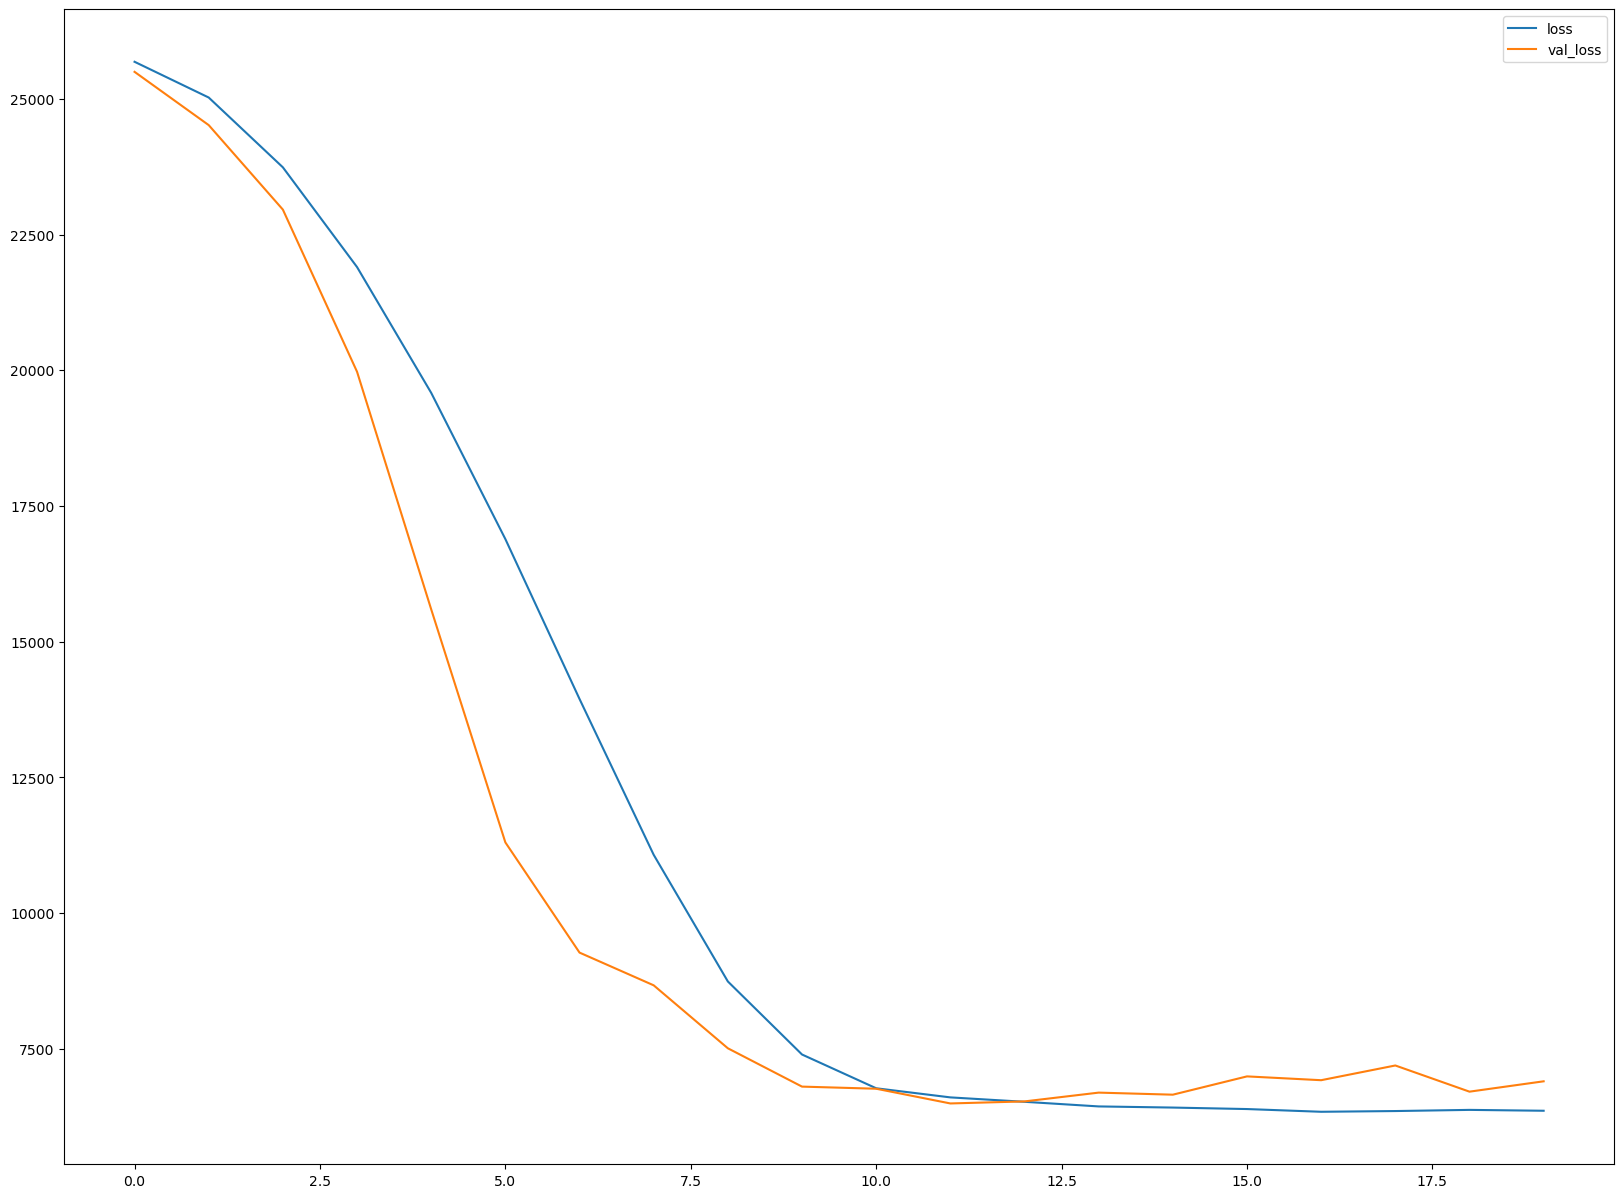

In [133]:
history_normalised_df = pd.DataFrame(history_normalised.history)
history_normalised_df.plot(figsize=(20,15))
print("min validation loss: {}".format(history_normalised_df['val_loss'].min()))

In [139]:
# Since the above model is worse than the model without normalisation, we try again with early stopping with delta=0.02:

X_train,X_test,y_train,y_test = train_test_split(X,y)

early_stopping2 = EarlyStopping(
    min_delta=0.002, # if no improvement on validation loss of min 0.001 stop
    patience=20, # num of epochs to wait before stopping
    restore_best_weights=True,
)

history_normalised2 = model_with_Normalisation.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping2]
)

Epoch 1/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 25686.5645 - val_loss: 25695.4746
Epoch 2/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 25316.5703 - val_loss: 24712.0996
Epoch 3/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 24139.5137 - val_loss: 23017.0605
Epoch 4/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 22283.4082 - val_loss: 20463.3223
Epoch 5/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 20256.0938 - val_loss: 14492.2686
Epoch 6/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 17497.3320 - val_loss: 11771.1045
Epoch 7/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 14671.0488 - val_loss: 10875.2822
Epoch 8/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 11732.4600 - val_loss: 8080.7769
Epoch 9/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 9207.4014 - val_loss: 7613.4814
Epoch 10/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 7697.0596 - val_loss: 6964.2354
Epoch 11/200
354/354 ━━━━━━━━━━━━━━━━━━━━ 8s

min validation loss: 6733.51025390625


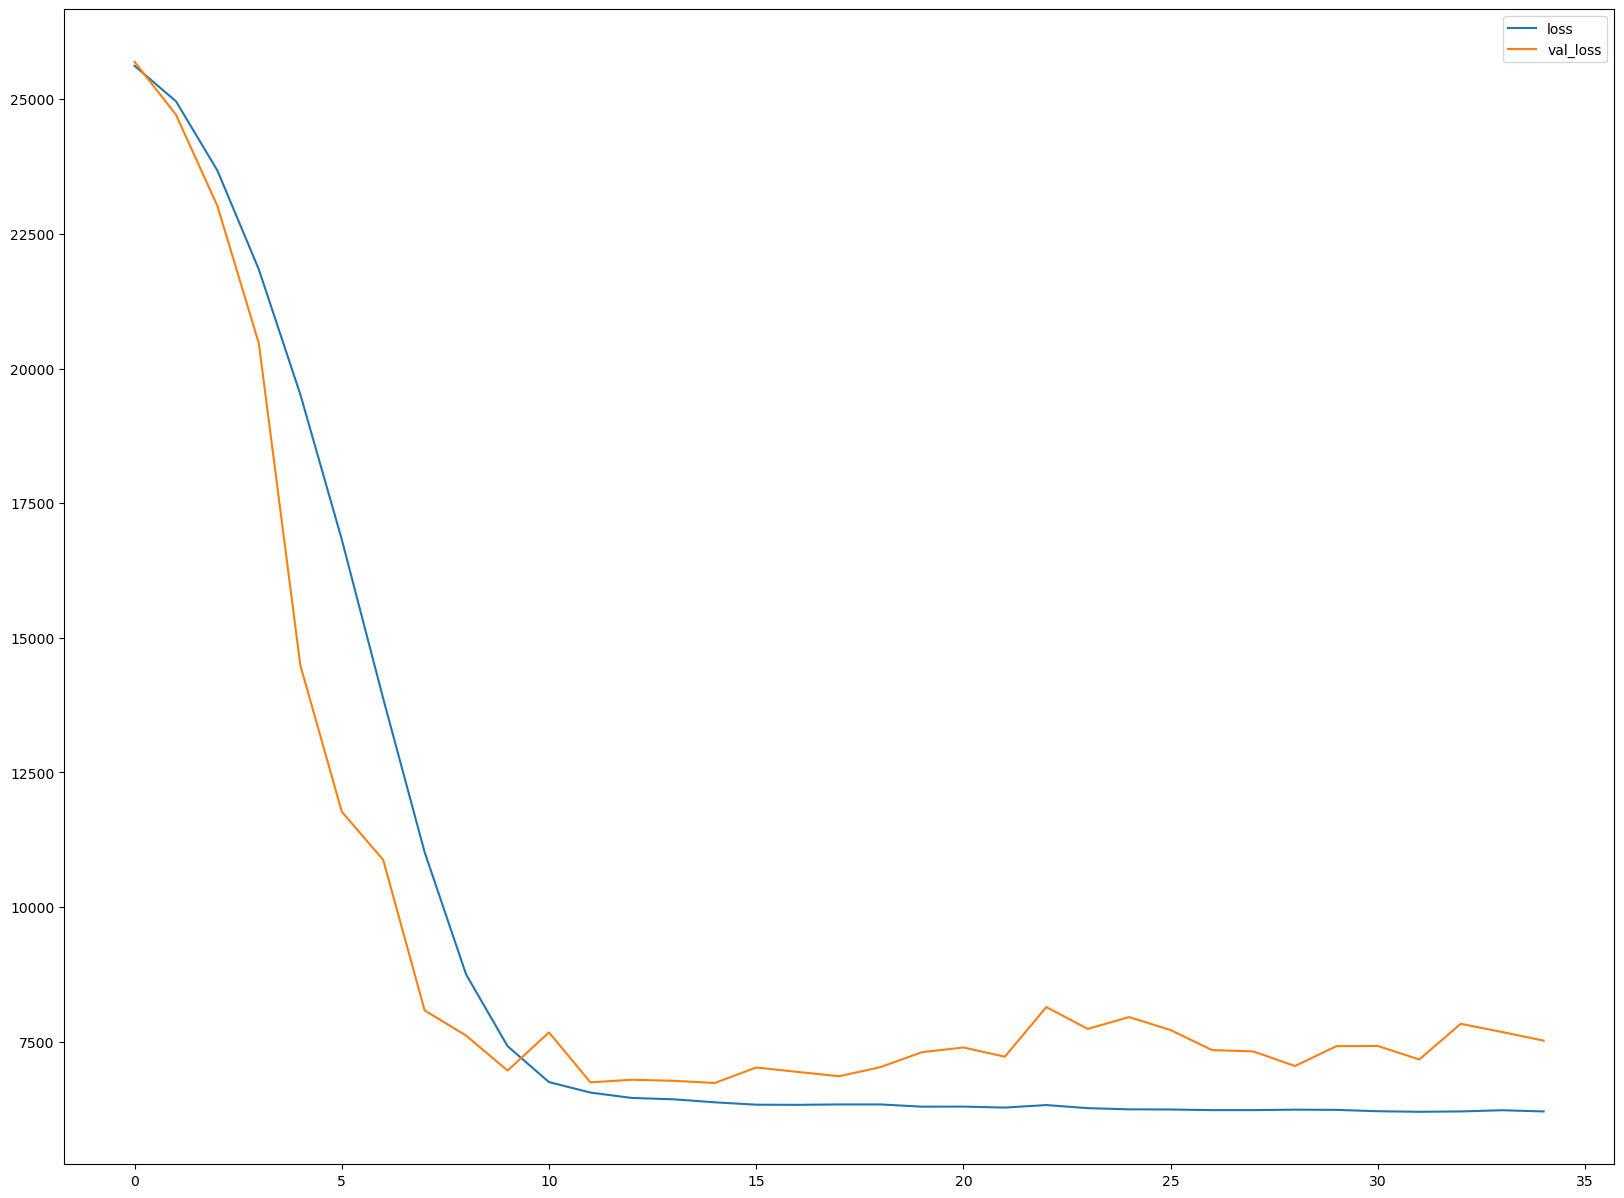

In [141]:
history_normalised2_df = pd.DataFrame(history_normalised2.history)
history_normalised2_df.plot(figsize=(20,15))
print("min validation loss: {}".format(history_normalised2_df['val_loss'].min()))

Making delta=0.02 obviously leads to overfitting. So the first earlystopping criterion was better.